# 正则化逻辑回归
你是工厂主管，你有一些芯片在两次测试的结果，你需要决定它们是否合格，你手里有之前的结果，现在需要构建一个逻辑回归模型进行预测。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path = 'ex2data2.txt'
df = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'Accepted'])
df.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
df.describe()

,Test1,Test2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


## 绘制样本图像

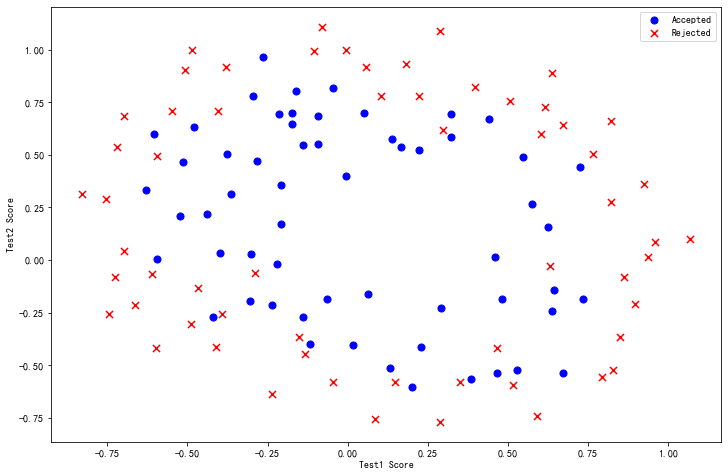

In [6]:
positive = df[df['Accepted'].isin([1])]
negative = df[df['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Test1'], positive['Test2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test1'], negative['Test2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test1 Score')
ax.set_ylabel('Test2 Score')
plt.show()

## 特征映射

![](img/feature_map.png)

In [7]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {'f{0}{1}'.format(i-p, p): np.power(x, i-p) * np.power(y, p)
                for i in range(0, power+1)
                for p in range(0, i+1)
           } 
    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

In [8]:
x1 = df.Test1.values
x2 = df.Test2.values
Y = df.Accepted

In [9]:
data = feature_mapping(x1, x2, power=6)
# data = data.sort_index(axis=1, ascending=True)
data.head()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [10]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646563,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


## 正则化代价函数

![](img/regularized_cost.png)

In [11]:
theta = np.zeros(data.shape[1])
X = feature_mapping(x1, x2, power=6, as_ndarray=True)
X.shape, Y.shape, theta.shape

((118, 28), (118,), (28,))

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
def cost(theta, X, Y):
    first = Y * np.log(sigmoid(X@theta.T))
    second = (1 - Y) * np.log(1 - sigmoid(X@theta.T))
    return -1 * np.mean(first + second)

In [14]:
def regularized_cost(theta, X, Y, l=1):
    theta_1n = theta[1:]
    regularized_term = l / (2 * len(X)) * np.power(theta_1n, 2).sum()
    return cost(theta, X, Y) + regularized_term

In [15]:
cost(theta, X, Y)

0.6931471805599454

In [16]:
regularized_cost(theta, X, Y, l=1)

0.6931471805599454

## 正则化梯度

![](img/regularized_gradient.png)

In [17]:
def gradient(theta, X, Y):
    return (1/len(X) * X.T @ (sigmoid(X @ theta.T) - Y))

In [18]:
def regularized_gradient(theta, X, Y, l=1):
    theta_1n = theta[1:]
    regularized_theta = l / len(X) * theta_1n
#     regularized_theta[0] = 0
    regularized_term = np.concatenate([np.array([0]), regularized_theta])
    
    return  gradient(theta, X, Y) + regularized_term
#     return  gradient(theta, X, Y) + regularized_theta
    

In [19]:
gradient(theta, X, Y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [20]:
regularized_gradient(theta, X, Y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

## 拟合参数

In [21]:
import scipy.optimize as opt
res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, Y), method='Newton-CG', jac=regularized_gradient)
res

     fun: 0.5290027297129904
     jac: array([ 7.75485668e-09, -5.19977992e-09, -4.82555055e-09,  7.35134501e-09,
        8.77704755e-10, -5.12269907e-08,  1.98910234e-08,  5.94995794e-09,
        4.38667584e-09, -2.20163008e-08, -1.74701447e-08, -8.31185087e-09,
       -3.33583564e-08, -1.94440521e-09, -5.21343130e-08,  1.23102721e-08,
        1.12523132e-08, -1.05491945e-08, -1.00299654e-08,  7.73684933e-09,
       -4.59637718e-08, -1.46347030e-08, -4.69708354e-10, -1.59044002e-08,
       -7.43073634e-09, -1.57433114e-08,  1.73515808e-09, -5.48489289e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 51
  status: 0
 success: True
       x: array([ 1.27274051,  0.62527134,  1.18108983, -2.01996035, -0.91742418,
       -1.43166578,  0.12400834, -0.36553367, -0.35723907, -0.17512971,
       -1.45815865, -0.05099018, -0.61555836, -0.27470706, -1.19281812,
       -0.24218707, -0.20600482, -0.04473193, -0.27778538, -0.29537741,
       -0.4

## 预测分析

In [22]:
def predict(theta, X):
    probability = sigmoid(X @ theta.T)
    return probability >= 0.5
    return [1 if x>=0.5 else 0 for x in probability]

In [23]:
# from sklearn.metrics import classification_report
# Y_pred = predict(res.x, X)
# print(classification_report(Y, Y_pred))

## 决策边界

In [24]:
# 得到theta
def find_theta(power, l):
    '''
    power: int
        raise x1, x2 to polynomial power
    l: int
        lambda constant for regularization term
    '''
    path = 'ex2data2.txt'
    df = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'Accepted'])
    df.head()

    Y = df.Accepted
    x1 = df.Test1.values
    x2 = df.Test2.values
    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

#     res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, Y, l), method='Newton-CG', jac=regularized_gradient)
    res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, Y, l), method='TNC', jac=regularized_gradient)
    return res.x

In [25]:
# 决策边界，thetaX = 0, thetaX <= threshhold
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.2, density)
    t2 = np.linspace(-1, 1.2, density)
    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)
    
    pred = mapped_cord.values @ theta.T
    decision = mapped_cord[np.abs(pred) <= threshhold]
    
    return decision.f10, decision.f01

In [26]:
# 画决策边界
def draw_boundary(power, l):
    density = 1000
    threshhold = 2 * 10**-3
    
    theta = find_theta(power, l)
    x, y = find_decision_boundary(density, power, theta, threshhold)
    positive = df[df['Accepted'].isin([1])]
    negative = df[df['Accepted'].isin([0])]

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(positive['Test1'], positive['Test2'], s=50, c='b', marker='o', label='Accepted')
    ax.scatter(negative['Test1'], negative['Test2'], s=50, c='g', marker='x', label='Rejected')
    ax.scatter(x, y, s=50, c='r', marker='.', label='Decision Boundary')
    ax.legend()
    ax.set_xlabel('Test1 Score')
    ax.set_ylabel('Test2 Score')

    plt.show()

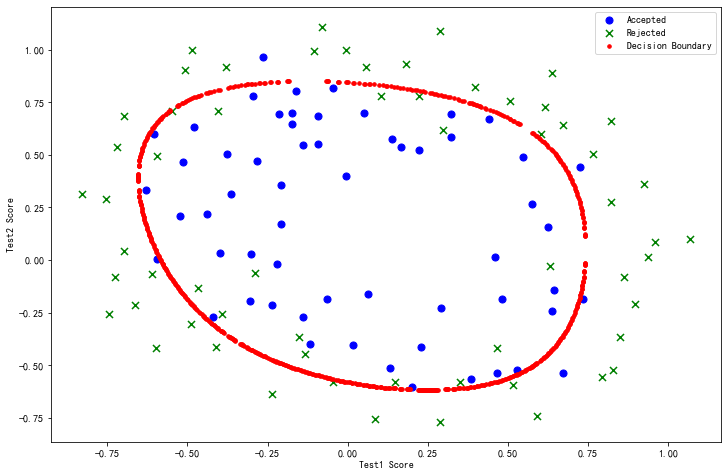

In [27]:
draw_boundary(6, l=1)

## 过拟合
overfitting

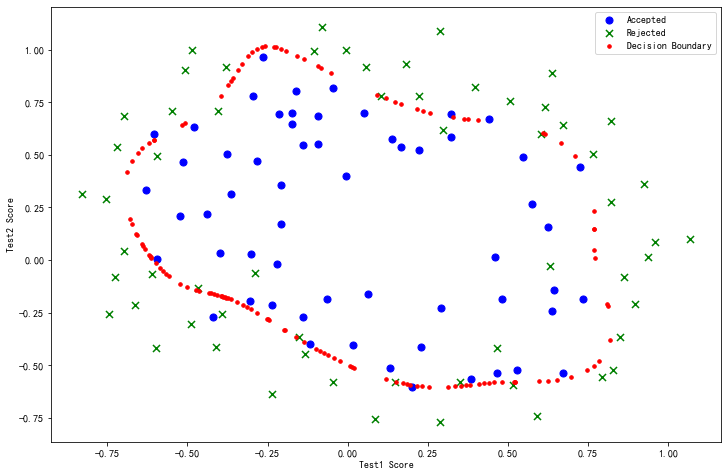

In [28]:
draw_boundary(6, l=0)

## 欠拟合
underfitting

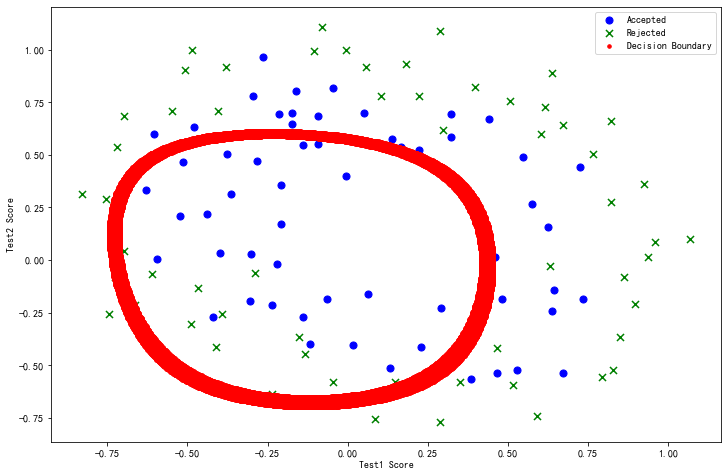

In [29]:
draw_boundary(6, l=100)